In [2]:
import requests
import base64
import datetime
from urllib.parse import urlencode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import re
import json

import datetime

import matplotlib.pyplot as plt


# Combine Genre Information with History

In [3]:
fileName = 'sample_one_2020'

dfGenres = pd.read_csv('genre_key_'+fileName+'.csv')
totalHist = pd.read_csv('totalHist_'+fileName+'.csv')

In [4]:
dfGenres

,artistName,genres
0,Imagine Dragons,"['modern rock', 'pop', 'rock']"
1,Chance the Rapper,"['chicago rap', 'conscious hip hop', 'hip hop'..."
2,Anderson .Paak,['escape room']
3,Lil Dicky,"['comedy rap', 'pop rap', 'rap']"
4,Breaking Benjamin,"['alternative metal', 'nu metal', 'post-grunge']"
...,...,...
1060,Lamemoroko,[]
1061,Joseph C. Phaze,[]
1062,Stary Olsa,"['medieval folk', 'tavern']"
1063,Alvei,[]


In [5]:
def convToList(row):
    if pd.isna(row['genres']):
        return['No Genre']
    else:
        return row['genres'][1:-1].replace('\'', '').split(', ')


In [6]:
dfGenres['genres'] = dfGenres.apply(convToList, axis=1)

In [7]:
genreList = []
for genres in dfGenres['genres']:
    for genre in genres:
        genreList.append(genre)

In [8]:
uniqueGenres = pd.Series(genreList).unique()

In [9]:
for genre in uniqueGenres:
    dfGenres[genre] = 0
for genre in uniqueGenres:
    totalHist[genre] = 0

In [10]:
def fillOutGenres(row):    
    for genre in row['genres']:
        row[genre] = 1
    return row
    

In [11]:
dfGenres = dfGenres.apply(fillOutGenres, axis=1)

In [12]:
totalHist

,endTime,artistName,trackName,msPlayed,modern rock,pop,rock,chicago rap,conscious hip hop,hip hop,...,deep underground hip hop,kentucky hip hop,la pop,auckland indie,kiwi rock,shimmer pop,wrestling,sacramento indie,medieval folk,tavern
0,2019-09-12 10:31,Imagine Dragons,It's Time,90773,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-09-13 00:42,Chance the Rapper,Get A Bag,201079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-09-13 00:48,Anderson .Paak,The Dreamer (feat. Talib Kweli & Timan Family ...,339973,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-09-13 00:52,Lil Dicky,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,290835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-09-13 00:56,Breaking Benjamin,Blow Me Away - Soundtrack Version,205680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26815,2020-09-13 21:11,Jack Harlow,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",227478,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26816,2020-09-13 21:15,Coldplay,Adventure of a Lifetime,263786,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26817,2020-09-13 21:18,Steve Jablonsky,"Transformers (2007) - ""Arrival On Earth"" from ...",170936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26818,2020-09-13 21:22,Calvin Harris,Summer,222533,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert Date Strings to Datetime objects

In [13]:
def convToDatetime(timeStr):
    return datetime.datetime.strptime(timeStr, '%Y-%m-%d %H:%M')

def getYear(x):
    return x.year

def getMonth(x):
    return x.month

def getDay(x):
    return x.day

In [14]:
totalHist['endTime'] = totalHist['endTime'].apply(convToDatetime)

In [15]:
totalHist["year"] = totalHist["endTime"].apply(getYear)
totalHist["month"] = totalHist["endTime"].apply(getMonth)
totalHist["day"] = totalHist["endTime"].apply(getDay)

# 2019 Analysis: Top Artists and Songs

In [16]:
df = totalHist[totalHist['year'] == 2019]
df.head()

,endTime,artistName,trackName,msPlayed,modern rock,pop,rock,chicago rap,conscious hip hop,hip hop,...,auckland indie,kiwi rock,shimmer pop,wrestling,sacramento indie,medieval folk,tavern,year,month,day
0,2019-09-12 10:31:00,Imagine Dragons,It's Time,90773,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,12
1,2019-09-13 00:42:00,Chance the Rapper,Get A Bag,201079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
2,2019-09-13 00:48:00,Anderson .Paak,The Dreamer (feat. Talib Kweli & Timan Family ...,339973,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
3,2019-09-13 00:52:00,Lil Dicky,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,290835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
4,2019-09-13 00:56:00,Breaking Benjamin,Blow Me Away - Soundtrack Version,205680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13


## Top 5 Artists by Month: Continuous

In [53]:
monthArtist = pd.pivot_table(df, values='msPlayed', index='artistName', columns='month', aggfunc=np.sum)

topArtists = []
for col in monthArtist:
    artists = monthArtist.nlargest(5, col)[col]
    topArtists.append(artists)

In [18]:
topArtists

[artistName
 Ariana Grande      7266055.0
 Imagine Dragons    5655096.0
 Neil Davidge       5025910.0
 Hans Zimmer        4740268.0
 Greta Van Fleet    4721593.0
 Name: 9, dtype: float64,
 artistName
 SZA                9921591.0
 Greta Van Fleet    9324047.0
 C418               8230406.0
 Drake              6257973.0
 Coldplay           6198355.0
 Name: 10, dtype: float64,
 artistName
 Ariana Grande    10834279.0
 Coldplay          7441904.0
 Beyoncé           5646216.0
 Neil Davidge      5298239.0
 Drake             4378489.0
 Name: 11, dtype: float64,
 artistName
 Ariana Grande      12510831.0
 Mariah Carey        8750324.0
 Imagine Dragons     8144822.0
 Greta Van Fleet     7052747.0
 Coldplay            6212523.0
 Name: 12, dtype: float64]

## Top 5 Artists by Month: Discrete

In [19]:
monthArtist = pd.pivot_table(df, values='msPlayed', index='artistName', columns='month', aggfunc='count')
topArtists = []
for col in monthArtist:
    artists = monthArtist.nlargest(5, col)[col]
    topArtists.append(artists)

In [20]:
topArtists

[artistName
 Ariana Grande      41.0
 Hans Zimmer        33.0
 Imagine Dragons    30.0
 Beyoncé            26.0
 C418               22.0
 Name: 9, dtype: float64,
 artistName
 SZA                 56.0
 Greta Van Fleet     44.0
 Ariana Grande       42.0
 C418                41.0
 Martin O'Donnell    40.0
 Name: 10, dtype: float64,
 artistName
 Ariana Grande      61.0
 Coldplay           48.0
 Drake              34.0
 Beyoncé            31.0
 Imagine Dragons    30.0
 Name: 11, dtype: float64,
 artistName
 Ariana Grande       75.0
 Imagine Dragons     70.0
 Mariah Carey        45.0
 Martin O'Donnell    40.0
 Coldplay            37.0
 Name: 12, dtype: float64]

## Top 5 Songs by Month: Continuous

In [21]:
monthSong = pd.pivot_table(df, values='msPlayed', index=['artistName','trackName'], columns='month', aggfunc=np.sum)
topSongs = []
for col in monthSong:
    songs = monthSong.nlargest(5, col)[col]
    topSongs.append(songs)

In [22]:
topSongs

[artistName       trackName                
 Miguel           waves - Tame Impala Remix    3888182.0
 Neil Davidge     Green And Blue               2845235.0
 Greta Van Fleet  Age Of Man                   2415879.0
 Doja Cat         Go To Town                   2388315.0
 Hans Zimmer      Sacred Pool Of Tears         2295579.0
 Name: 9, dtype: float64,
 artistName       trackName                       
 SZA              Love Galore (feat. Travis Scott)    5368320.0
 Greta Van Fleet  Edge Of Darkness                    5040685.0
 Drake            Childs Play                         4682386.0
 C418             Blind Spots                         4026034.0
 Miguel           waves - Tame Impala Remix           3585798.0
 Name: 10, dtype: float64,
 artistName           trackName      
 Christopher Jackson  Where You Are      3966816.0
 Ariana Grande        R.E.M              3959484.0
 Jason Mraz           I Won't Give Up    3463295.0
 Neil Davidge         117                2690244.0
 Aria

## Top 5 Songs by Month: Discrete

In [23]:
monthSong = pd.pivot_table(df, values='msPlayed', index=['artistName','trackName'], columns='month', aggfunc='count')
topSongs = []
for col in monthSong:
    songs = monthSong.nlargest(5, col)[col]
    topSongs.append(songs)

In [24]:
topSongs

[artistName     trackName                
 Miguel         waves - Tame Impala Remix    17.0
 Hans Zimmer    Oogway Ascends               13.0
 Doja Cat       Go To Town                   12.0
 Ariana Grande  successful                   11.0
 Hans Zimmer    Sacred Pool Of Tears          9.0
 Name: 9, dtype: float64,
 artistName       trackName                       
 SZA              The Weekend - Funk Wav Remix        24.0
 Greta Van Fleet  Edge Of Darkness                    23.0
 Drake            Childs Play                         21.0
 Miguel           waves - Tame Impala Remix           21.0
 SZA              Love Galore (feat. Travis Scott)    21.0
 Name: 10, dtype: float64,
 artistName           trackName                    
 Christopher Jackson  Where You Are                    21.0
 Ariana Grande        R.E.M                            18.0
 Jason Mraz           I Won't Give Up                  15.0
 Kanye West           Father Stretch My Hands Pt. 1    12.0
 Ariana Grande   

# Analysis: Genres

In [25]:
df.head()

,endTime,artistName,trackName,msPlayed,modern rock,pop,rock,chicago rap,conscious hip hop,hip hop,...,auckland indie,kiwi rock,shimmer pop,wrestling,sacramento indie,medieval folk,tavern,year,month,day
0,2019-09-12 10:31:00,Imagine Dragons,It's Time,90773,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,12
1,2019-09-13 00:42:00,Chance the Rapper,Get A Bag,201079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
2,2019-09-13 00:48:00,Anderson .Paak,The Dreamer (feat. Talib Kweli & Timan Family ...,339973,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
3,2019-09-13 00:52:00,Lil Dicky,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,290835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13
4,2019-09-13 00:56:00,Breaking Benjamin,Blow Me Away - Soundtrack Version,205680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019,9,13


In [26]:
def fillGenres(row):
    artist = row['artistName']
    genres = dfGenres[dfGenres['artistName'] == artist]['genres']
    for genre in genres:
        row[genre] = 1
    return row

In [27]:
df = df.apply(fillGenres, axis=1)

In [28]:
genreTotals = []
genres = dfGenres.columns[2:]


In [29]:
for genre in genres:
    genreTotals.append(sum(df[df[genre] == 1]['msPlayed']))

In [30]:
topGenres = pd.DataFrame({'genres':genres, 'totalPlay':genreTotals})
topGenres = topGenres.sort_values(by = 'totalPlay', ascending=False).reset_index(drop='True')
topGenres.head(10)

,genres,totalPlay
0,pop,404523398
1,dance pop,248697767
2,rock,200375727
3,pop rap,147462149
4,rap,141904903
5,pop rock,114688154
6,post-teen pop,114541164
7,modern rock,104476693
8,hip hop,99818116
9,neo mellow,83373186


## Pie Chart for All Genres > Threshold

In [31]:
pieGenres = topGenres.copy()
pieGenres['totalPlay'] = pieGenres['totalPlay']/sum(topGenres['totalPlay'])
pieGenres

,genres,totalPlay
0,pop,0.094138
1,dance pop,0.057876
2,rock,0.046630
3,pop rap,0.034317
4,rap,0.033023
...,...,...
578,uk post-punk,0.000000
579,canadian celtic,0.000000
580,vancouver punk,0.000000
581,mod revival,0.000000


## Clean Pie Chart

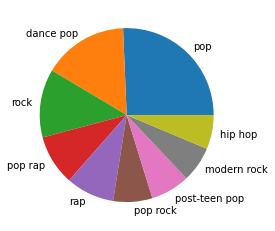

In [36]:
labels = pieGenres['genres'][:9]
sizes = pieGenres['totalPlay'][:9]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, normalize=True)

plt.show()

## Messy Pie Chart

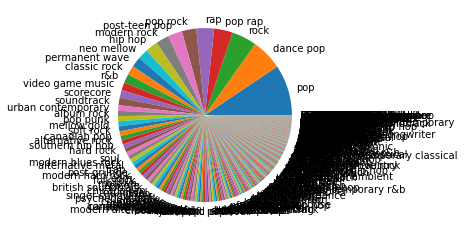

In [37]:
labels = pieGenres['genres']
sizes = pieGenres['totalPlay']

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, normalize=True)

plt.show()

## Genres Over Time (Line and Bar Charts)

In [61]:
df.groupby('month').sum()

,msPlayed,modern rock,pop,rock,chicago rap,conscious hip hop,hip hop,pop rap,rap,escape room,...,la pop,auckland indie,kiwi rock,shimmer pop,wrestling,sacramento indie,medieval folk,tavern,year,day
month,,,,,,,,,,,,,,,,,,,,,
9,225067079,121,487,230,24,19,102,162,129,31,...,0,0,0,0,0,0,0,0,3048690,33596
10,315225947,179,758,317,36,27,184,284,268,33,...,0,0,0,0,0,0,0,0,4070304,31545
11,256542964,161,634,264,41,20,151,198,225,17,...,0,0,0,0,0,0,0,0,3521136,26542
12,350331242,256,880,452,43,29,196,287,258,29,...,0,0,0,0,0,0,0,0,5528022,39885
